In [ ]:
!pip install --upgrade huggingface-hub

In [ ]:
!wget https://huggingface.co/datasets/#ANONYMIZED/Qwen3Activations/resolve/main/train/synthetic_train_layer_20.pt -O train.pt
!wget https://huggingface.co/datasets/#ANONYMIZED/Qwen3Activations/resolve/main/validation/synthetic_train_layer_20.pt -O validation.pt
!wget https://huggingface.co/datasets/#ANONYMIZED/Qwen3Activations/resolve/main/test/synthetic_train_layer_20.pt -O test.pt


In [ ]:
!pip install matplotlib

In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from datasets import load_dataset
ds = load_dataset("hrithikpiyush/acl-arc")
ds.set_format("pandas")
train_labels=ds["train"]['intent'][:]
validation_labels=ds["validation"]['intent'][:]
test_labels=ds["test"]['intent'][:]

In [5]:
!git lfs install
!git clone https://huggingface.co/datasets/#ANONYMIZED/Qwen3Activations


git : 'lfs' n'est pas une commande git. Voir 'git --help'.

La commande la plus ressemblante est
	log
Clonage dans 'Qwen3Activations'...
remote: Enumerating objects: 1422, done.
remote: Counting objects: 100% (600/600), done.
remote: Compressing objects: 100% (600/600), done.
remote: Total 1422 (delta 315), reused 0 (delta 0), pack-reused 822 (from 1)
Réception d'objets: 100% (1422/1422), 421.38 Kio | 9.36 Mio/s, fait.
Résolution des deltas: 100% (630/630), fait.


In [ ]:
import torch
import urllib.request
from torch.utils.data import TensorDataset, DataLoader

layer_number=39

train_url = "https://huggingface.co/datasets/#ANONYMIZED/Qwen3Activations/resolve/main/train/synthetic_train_layer_"+str(layer_number)+".pt"
validation_url = "https://huggingface.co/datasets/#ANONYMIZED/Qwen3Activations/resolve/main/validation/synthetic_train_layer_"+str(layer_number)+".pt"
test_url = "https://huggingface.co/datasets/#ANONYMIZED/Qwen3Activations/resolve/main/test/synthetic_train_layer_"+str(layer_number)+".pt"

urllib.request.urlretrieve(train_url, "train.pt")
urllib.request.urlretrieve(validation_url, "validation.pt")
urllib.request.urlretrieve(test_url, "test.pt")

train = torch.load('train.pt')
validation = torch.load('validation.pt')
test = torch.load('test.pt')

train_dataset=TensorDataset(train,torch.tensor(train_labels))
validation_dataset=TensorDataset(validation,torch.tensor(validation_labels))
test_dataset=TensorDataset(test,torch.tensor(test_labels))

train_dataloader= DataLoader(train_dataset,batch_size=32,shuffle=True)
validation_dataloader= DataLoader(validation_dataset,batch_size=32,shuffle=True)
test_dataloader= DataLoader(test_dataset,batch_size=32,shuffle=True)

In [6]:
import torch.nn as nn

class MLP(nn.Module):
    def __init__(self, input_size=5120, hidden_size=256, output_size=6):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [12]:
def val_evaluation():
  #print('VALIDATION SCORES:')
  mymodel.eval()
  with torch.no_grad():
    output_val=mymodel(validation)
    rez_val=torch.argmax(output_val,dim=1)
    #print(classification_report(validation_labels,rez_val))
  return classification_report(validation_labels,rez_val,output_dict=True)['macro avg']['f1-score']

def test_evaluation():
  #print('TEST SCORES:')
  mymodel.eval()
  with torch.no_grad():
    output_test=mymodel(test)
    rez_test=torch.argmax(output_test,dim=1)
    #print(classification_report(test_labels,rez_test))
    return classification_report(test_labels,rez_test,output_dict=True)['macro avg']['f1-score']

def plot_loss():
  plt.figure(figsize=(10, 5))
  plt.plot(losses)
  plt.title('Training Loss over Epochs')
  plt.xlabel('Batch')
  plt.ylabel('Loss')
  plt.show()

def plot_f1():
  plt.figure(figsize=(10, 5))
  plt.plot(f1_scores)
  plt.title('Macro F1 on validation for each epoch')
  plt.xlabel('Batch')
  plt.ylabel('Loss')
  plt.show()

In [8]:
#training phase:
import torch


mymodel=MLP()
optimizer=torch.optim.Adam(mymodel.parameters(),lr=0.001)
criterion=nn.CrossEntropyLoss()

In [9]:
from tqdm import tqdm

In [ ]:
!pip install urllib

In [11]:
import urllib.request
liste_train=[]
liste_validation=[]
liste_test=[]
for layer_number in range(40):

    train_url = "https://huggingface.co/datasets/#ANONYMIZED/Qwen3Activations/resolve/main/train/synthetic_train_layer_"+str(layer_number)+".pt"
    validation_url = "https://huggingface.co/datasets/#ANONYMIZED/Qwen3Activations/resolve/main/validation/synthetic_train_layer_"+str(layer_number)+".pt"
    test_url = "https://huggingface.co/datasets/#ANONYMIZED/Qwen3Activations/resolve/main/test/synthetic_train_layer_"+str(layer_number)+".pt"
    urllib.request.urlretrieve(train_url, "train_"+str(layer_number)+".pt")
    urllib.request.urlretrieve(validation_url, "validation_"+str(layer_number)+".pt")
    urllib.request.urlretrieve(test_url, "test_"+str(layer_number)+".pt")

In [ ]:
#on fait ça 10 fois ! pour avoir les moyennes:
from torch.utils.data import TensorDataset, DataLoader

all_scores_val=[]
all_scores_test=[]
for iteration in tqdm(range(100)):
  for layer_number in range(40):
    mymodel=MLP() #J AVAIS PAS INITIALISE A CHAQUE FOIS !!
    optimizer=torch.optim.Adam(mymodel.parameters(),lr=0.001)
    # train_url = "https://huggingface.co/datasets/#ANONYMIZED/Qwen3Activations/resolve/main/train/synthetic_train_layer_"+str(layer_number)+".pt"
    # validation_url = "https://huggingface.co/datasets/#ANONYMIZED/Qwen3Activations/resolve/main/validation/synthetic_train_layer_"+str(layer_number)+".pt"
    # test_url = "https://huggingface.co/datasets/#ANONYMIZED/Qwen3Activations/resolve/main/test/synthetic_train_layer_"+str(layer_number)+".pt"

    # urllib.request.urlretrieve(train_url, "train.pt")
    # urllib.request.urlretrieve(validation_url, "validation.pt")
    # urllib.request.urlretrieve(test_url, "test.pt")

    # train = torch.load('train.pt')
    # validation = torch.load('validation.pt')
    # test = torch.load('test.pt')

    train= torch.load("train_"+str(layer_number)+".pt")
    validation= torch.load("validation_"+str(layer_number)+".pt")
    test= torch.load("test_"+str(layer_number)+".pt")

    train_dataset=TensorDataset(train,torch.tensor(train_labels))
    validation_dataset=TensorDataset(validation,torch.tensor(validation_labels))
    test_dataset=TensorDataset(test,torch.tensor(test_labels))

    train_dataloader= DataLoader(train_dataset,batch_size=32,shuffle=True)
    validation_dataloader= DataLoader(validation_dataset,batch_size=32,shuffle=True)
    test_dataloader= DataLoader(test_dataset,batch_size=32,shuffle=True)
    #print('LAYER NUMBER',layer_number)
    ############################################################################



    #losses=[]
    #f1_scores_val=[]
    #f1_scores_test=[]

    epoch=10
    for i in range(epoch):
      mymodel.train()
      for X_batch, Y_batch in train_dataloader:
        optimizer.zero_grad()
        outputs=mymodel(X_batch)
        loss=criterion(outputs,Y_batch)
        #losses.append(loss.item())
        loss.backward()
        optimizer.step()
    f1_scores_val.append(val_evaluation())
    f1_scores_test.append(test_evaluation())
    #plot_loss()
    #all_scores_val.append(f1_scores_val)
    #all_scores_test.append(f1_scores_test)


print(all_scores)

de 0 à 39 (40 layers)

In [ ]:
len(f1_scores_test)


4005

In [21]:
len(f1_scores_val)

4005

In [55]:
layer_scores_val = [[] for _ in range(40)]
layer_scores_test = [[] for _ in range(40)]

for i,elt in enumerate(f1_scores_test[5:]):
  layer_scores_test[i%40].append(elt)


for i,elt in enumerate(f1_scores_val[5:]):
  layer_scores_val[i%40].append(elt)

In [57]:
import numpy as np
mean_val_scores=[]
mean_test_scores=[]
for layer in layer_scores_val:
  mean_val_scores.append(np.mean(layer))
for layer in layer_scores_test:
  mean_test_scores.append(np.mean(layer))




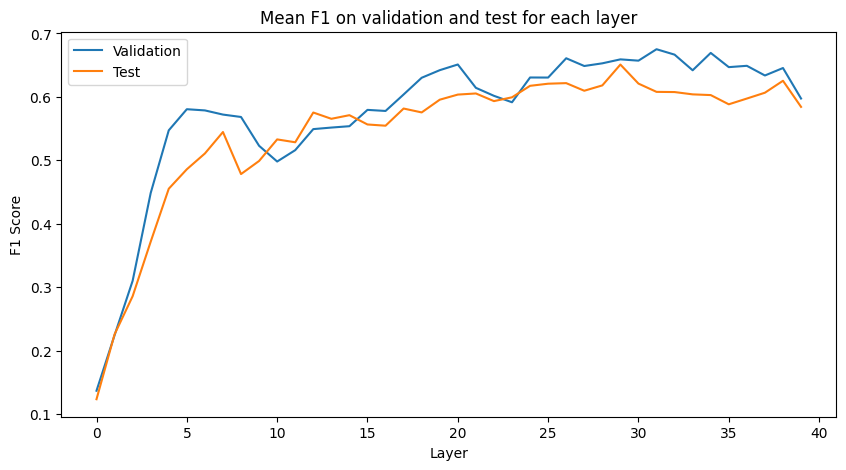

In [58]:
#plot mean_val_scores and mean_test_scores:
plt.figure(figsize=(10, 5))
plt.plot(mean_val_scores)
plt.plot(mean_test_scores)
plt.title('Mean F1 on validation and test for each layer')
plt.xlabel('Layer')
plt.ylabel('F1 Score')
plt.legend(['Validation', 'Test'])
plt.show()


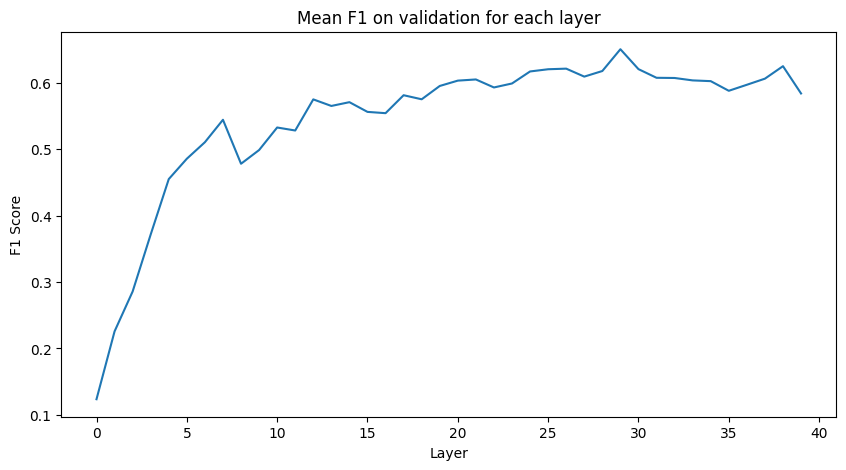

In [51]:
#plot mean_val_scores:
plt.figure(figsize=(10, 5))
plt.plot(mean_val_scores)
plt.title('Mean F1 on validation for each layer')
plt.xlabel('Layer')
plt.ylabel('F1 Score')
plt.show()


In [44]:
len(layer_scores[3])

100

In [46]:
#write the content of f1_scores_test in a file:
with open('f1_scores_validation.txt', 'w') as f:
  for elt in f1_scores_val[5:]:
    f.write(str(elt) + '\n')


In [ ]:
all_scores_test

[[...]]

In [ ]:
test_bigger=0
val_bigger=0
rez=0
count=0
for i,j in zip(all_scores_test,all_scores_val):
    rez=rez+(i[0]-j[0])
    print(rez)

-0.023483528337897255
-0.04850104028216416
-0.11418962977852286
-0.24346557722037382
-0.21857868224429605
-0.3659346248096926
-0.36160217966942904
-0.3001780415006063
-0.4511672808502425
-0.4935059567932545
-0.5804756741977545
-0.4955456606876232
-0.3474587214167758
-0.4522798995298665
-0.39260256952300115
-0.4138238435600465
-0.4094763780986232
-0.399991731615098
-0.47235988338704377
-0.5803542653840108
-0.5456744339662407
-0.4951543761311039
-0.5622625442267328
-0.6311250802180755
-0.5521277612554948
-0.4431083133638566
-0.5237839121097786
-0.6088344533528743
-0.7241775833186458
-0.7621457827275232
-0.6523479759290188
-0.6501988968083382
-0.7082942463630194
-0.677787000179055
-0.7395570994444508
-0.8210049407015357
-0.7983854430279088
-0.7896618855186636
-0.8572212190269414
-0.865830698172135
-0.8893142265100322
-0.9020424198023423
-0.877104216447743
-1.002580872326523
-1.2059936434337717
-1.367584224186627
-1.5264978635269422
-1.5269246801948497
-1.6688229475525649
-1.71363194213903

TypeError: unsupported operand type(s) for -: 'list' and 'list'

In [ ]:
rez

138

In [ ]:
val_bigger

262

In [ ]:
len(all_scores_val)

400

In [ ]:
len(by_layer)

40

In [ ]:
import numpy as np

by_layer=[[]]*40
for i in range(len(all_scores_val)):
  by_layer[i%40].append(all_scores_val[i][0])



#for layer in by_layer:
#  print(np.mean(layer))

In [ ]:
by_layer[0]
la_liste_rez=[]

for i in range(0,10):
  la_liste_rez.append(by_layer[i][40*i:40*i+40])

In [ ]:
len(la_liste_rez[2])

40

In [ ]:
len(la_liste_rez)

10

In [ ]:
by_layer=[[]]*40

for epoch in la_liste_rez:
  for rez_layer in epoch:
    by_layer[i%40].append(rez_layer)



In [ ]:
for liste in la_liste_rez:
  print(liste[0])

0.13675213675213674
0.13675213675213674
0.13675213675213674
0.13675213675213674
0.13675213675213674
0.13675213675213674
0.13675213675213674
0.13675213675213674
0.13675213675213674
0.13675213675213674
